In [1]:
# =========================
# 01. SETUP & LOAD DATA
# =========================
import sys
from pathlib import Path
ROOT_DIR = Path().resolve().parents[0]  
sys.path.append(str(ROOT_DIR))

import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from constants import DATA_URL 

df = pd.read_csv(DATA_URL)
print("Total movies:", len(df))

Total movies: 7668


In [2]:
# =========================
# 02. DATA CLEANING
# =========================

# Standardize numeric columns
num_cols = ["budget", "gross", "votes", "score", "runtime", "year"]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# Drop rows without core financial data
if {"budget", "gross"}.issubset(df.columns):
    df = df.dropna(subset=["budget", "gross"])

# Fill missing numeric values
df = df.fillna(df.mean(numeric_only=True))

# -------------------------
# Standardize movie title column
# -------------------------
title_candidates = ["title", "movie", "movie_title", "name", "film"]

for c in title_candidates:
    if c in df.columns:
        df = df.rename(columns={c: "title"})
        break


In [3]:

# =========================
# 03. KPI CALCULATIONS
# =========================
# ROI
if {"budget", "gross"}.issubset(df.columns):
    df["ROI"] = (df["gross"] - df["budget"]) / df["budget"]

# Engagement
if {"votes", "gross"}.issubset(df.columns):
    df["engagement"] = df["votes"] / df["gross"]

# CPM
if {"budget", "votes"}.issubset(df.columns):
    df["CPM"] = df["budget"] / df["votes"]

In [4]:
# =========================
# 04. DATASET OVERVIEW (Slides 1–4)
# =========================
print("Year range:", int(df["year"].min()), "-", int(df["year"].max()))
print(df.describe())


Year range: 1980 - 2020
              year        score         votes        budget         gross  \
count  5436.000000  5436.000000  5.436000e+03  5.436000e+03  5.436000e+03   
mean   2001.651582     6.392642  1.149110e+05  3.593864e+07  1.030045e+08   
std      10.541791     0.963200  1.842255e+05  4.154770e+07  1.871051e+08   
min    1980.000000     1.900000  1.950000e+02  6.000000e+03  3.090000e+02   
25%    1993.000000     5.800000  1.900000e+04  1.000000e+07  1.067412e+07   
50%    2002.000000     6.500000  5.200000e+04  2.100000e+07  3.671199e+07   
75%    2011.000000     7.100000  1.290000e+05  4.500000e+07  1.119478e+08   
max    2020.000000     9.300000  2.400000e+06  3.560000e+08  2.847246e+09   

           runtime           ROI   engagement           CPM  
count  5436.000000   5436.000000  5436.000000   5436.000000  
mean    108.156394      5.719253     0.018043   1039.449676  
std      18.119734    183.843156     0.379720   2314.477549  
min      63.000000     -0.999979  

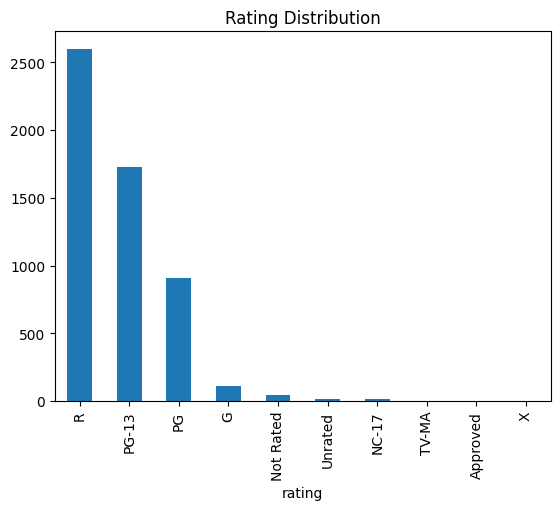

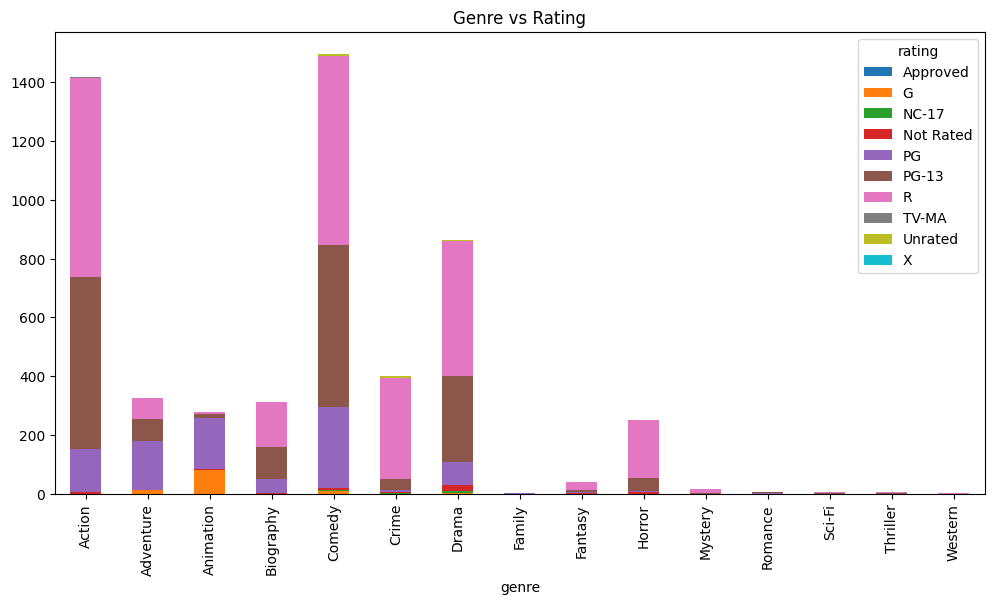

In [5]:

# =========================
# 05. RATING & GENRE DISTRIBUTION (Slide 5)
# =========================
if "rating" in df.columns:
    rating_dist = df["rating"].value_counts()
    rating_dist.plot(kind="bar", title="Rating Distribution")
    plt.show()

    genre_rating = pd.crosstab(df["genre"], df["rating"])
    genre_rating.plot(kind="bar", stacked=True, figsize=(12,6))
    plt.title("Genre vs Rating")
    plt.show()


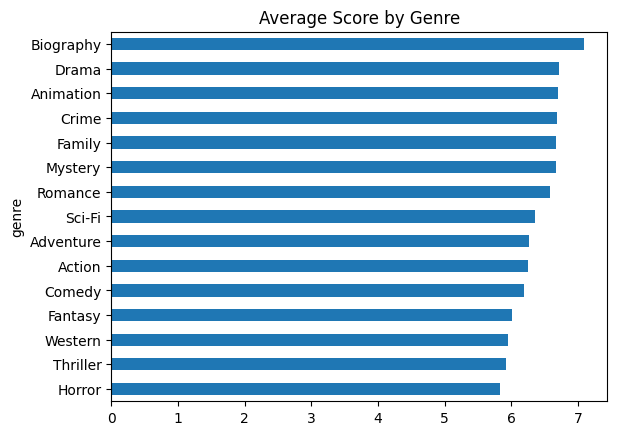

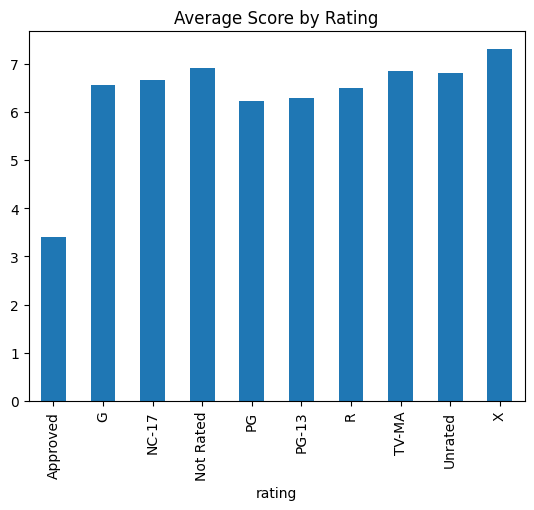

In [6]:

# =========================
# 06. AUDIENCE & QUALITY – SCORE (Slide 6)
# =========================
if "score" in df.columns:
    score_genre = df.groupby("genre")["score"].mean().sort_values()
    score_genre.plot(kind="barh", title="Average Score by Genre")
    plt.show()

    if "rating" in df.columns:
        score_rating = df.groupby("rating")["score"].mean()
        score_rating.plot(kind="bar", title="Average Score by Rating")
        plt.show()

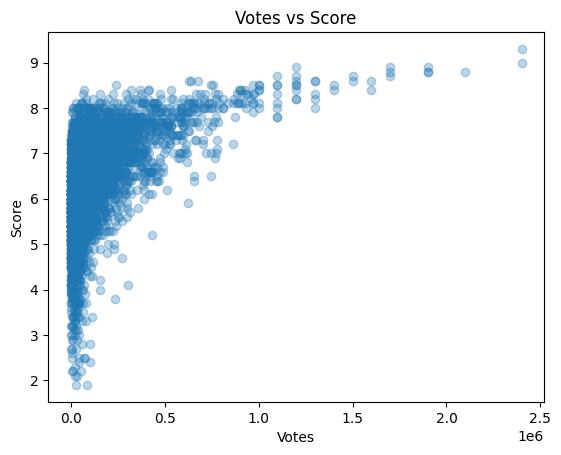

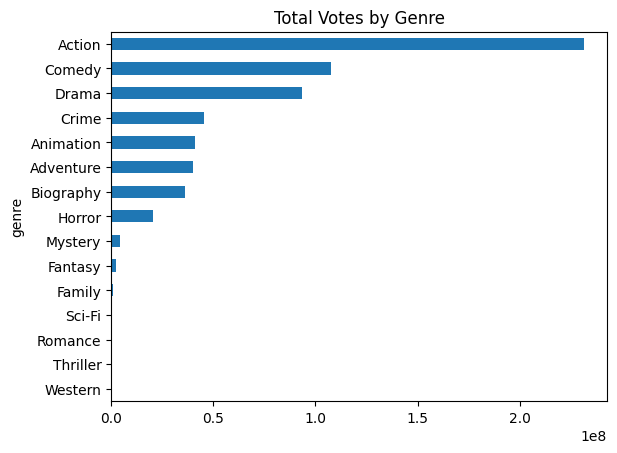

In [7]:

# =========================
# 07. POPULARITY – VOTES (Slide 7)
# =========================
if {"votes", "score"}.issubset(df.columns):
    plt.scatter(df["votes"], df["score"], alpha=0.3)
    plt.xlabel("Votes")
    plt.ylabel("Score")
    plt.title("Votes vs Score")
    plt.show()

    votes_genre = df.groupby("genre")["votes"].sum().sort_values()
    votes_genre.plot(kind="barh", title="Total Votes by Genre")
    plt.show()


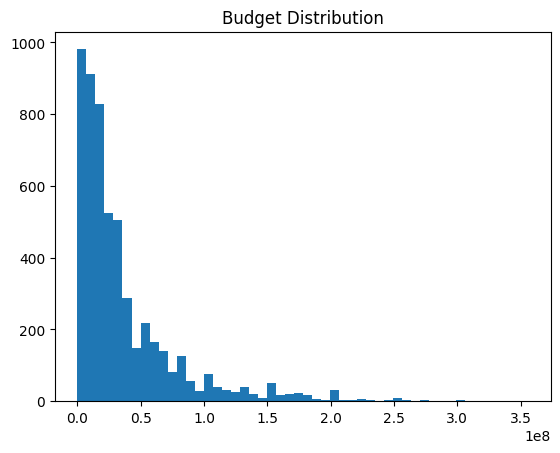

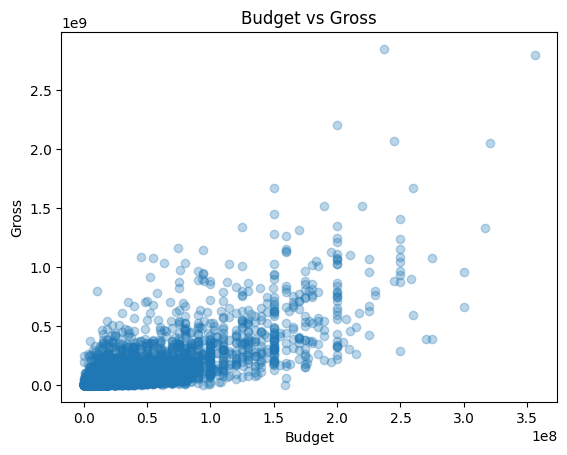

In [8]:
# =========================
# 08. FINANCIAL OVERVIEW (Slide 8)
# =========================
plt.hist(df["budget"], bins=50)
plt.title("Budget Distribution")
plt.show()

plt.scatter(df["budget"], df["gross"], alpha=0.3)
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.title("Budget vs Gross")
plt.show()


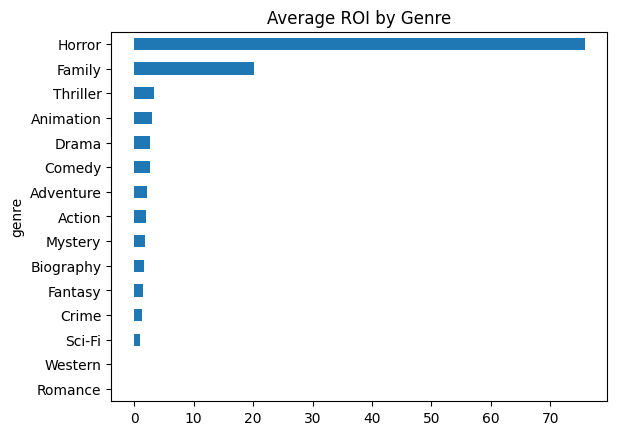

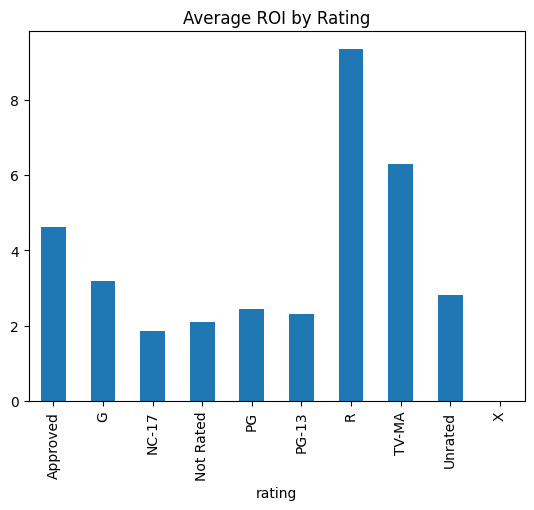

In [9]:

# =========================
# 09. ROI ANALYSIS (Slide 9)
# =========================
roi_genre = df.groupby("genre")["ROI"].mean().sort_values()
roi_genre.plot(kind="barh", title="Average ROI by Genre")
plt.show()

if "rating" in df.columns:
    roi_rating = df.groupby("rating")["ROI"].mean()
    roi_rating.plot(kind="bar", title="Average ROI by Rating")
    plt.show()


In [10]:

# =========================
# 10. TOP & BOTTOM MOVIES (Slide 10)
# =========================
top10 = df.sort_values("ROI", ascending=False).head(10)
bottom10 = df.sort_values("ROI").head(10)


print("Top 10 ROI Movies")
display(top10[["title", "genre", "ROI", "budget", "gross"]])

print("Bottom 10 ROI Movies")
display(bottom10[["title", "genre", "ROI", "budget", "gross"]])


Top 10 ROI Movies


,title,genre,ROI,budget,gross
5114,Paranormal Activity,Horror,12889.386667,15000.0,193355800.0
3459,The Blair Witch Project,Horror,4142.984983,60000.0,248639099.0
6815,The Gallows,Horror,428.644100,100000.0,42964410.0
2093,El Mariachi,Action,290.560000,7000.0,2040920.0
5154,Once,Drama,138.578147,150000.0,20936722.0
2467,Clerks,Comedy,115.708519,27000.0,3151130.0
4471,Napoleon Dynamite,Comedy,114.347217,400000.0,46138887.0
3233,In the Company of Men,Comedy,111.178920,25000.0,2804473.0
4814,Keeping Mum,Comedy,108.981266,169000.0,18586834.0
4304,Open Water,Adventure,108.366974,500000.0,54683487.0


Bottom 10 ROI Movies


,title,genre,ROI,budget,gross
3203,Trojan War,Comedy,-0.999979,15000000.0,309.0
2417,Madadayo,Drama,-0.999950,11900000.0,596.0
3681,Ginger Snaps,Drama,-0.999489,5000000.0,2554.0
2434,Philadelphia Experiment II,Action,-0.999406,5000000.0,2970.0
1898,The Lovers on the Bridge,Drama,-0.998940,28000000.0,29679.0
3413,Savior,Drama,-0.998567,10000000.0,14328.0
5640,Tanner Hall,Drama,-0.998309,3000000.0,5073.0
760,Crimewave,Comedy,-0.998300,3000000.0,5101.0
2401,Deadfall,Crime,-0.998163,10000000.0,18369.0
3438,Hell's Kitchen,Crime,-0.998048,6000000.0,11710.0


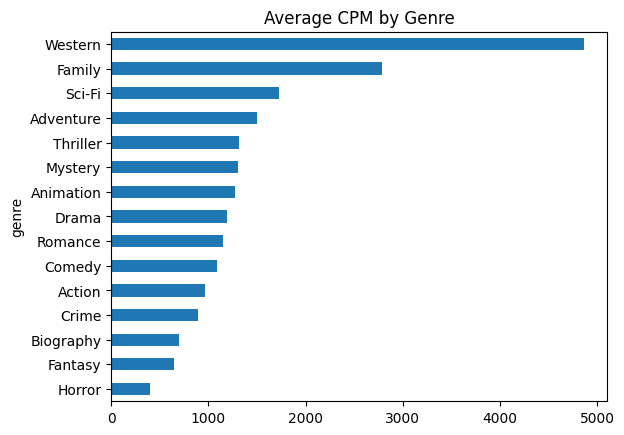

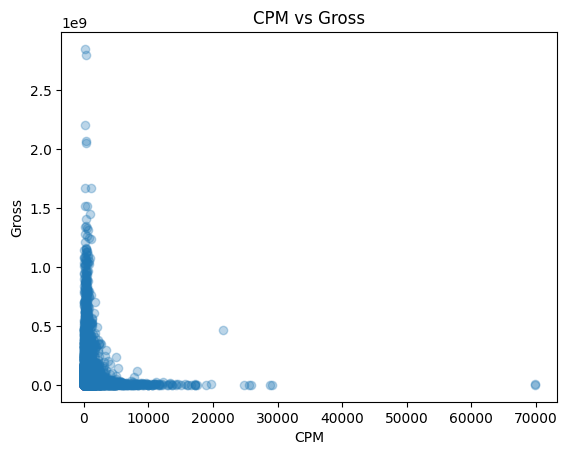

In [11]:

# =========================
# 11. MARKETING EFFICIENCY – CPM (Slide 11)
# =========================
if "CPM" in df.columns:
    cpm_genre = df.groupby("genre")["CPM"].mean().sort_values()
    cpm_genre.plot(kind="barh", title="Average CPM by Genre")
    plt.show()

    plt.scatter(df["CPM"], df["gross"], alpha=0.3)
    plt.xlabel("CPM")
    plt.ylabel("Gross")
    plt.title("CPM vs Gross")
    plt.show()

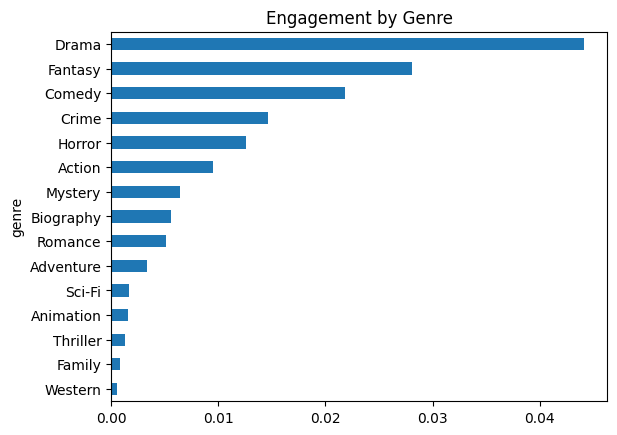

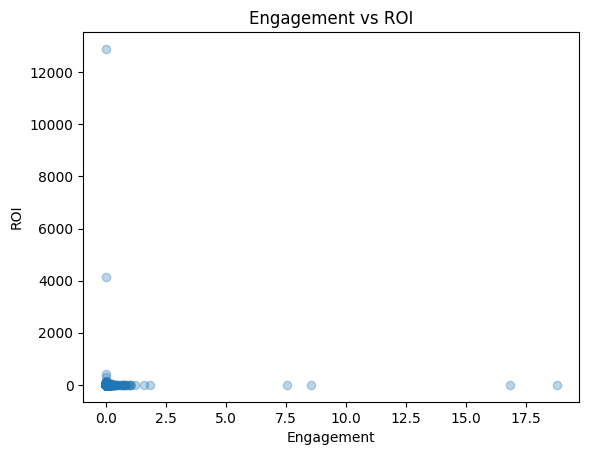

In [12]:

# =========================
# 12. ENGAGEMENT ANALYSIS (Slide 12)
# =========================
if "engagement" in df.columns:
    engagement_genre = df.groupby("genre")["engagement"].mean().sort_values()
    engagement_genre.plot(kind="barh", title="Engagement by Genre")
    plt.show()

    plt.scatter(df["engagement"], df["ROI"], alpha=0.3)
    plt.xlabel("Engagement")
    plt.ylabel("ROI")
    plt.title("Engagement vs ROI")
    plt.show()

In [13]:

# =========================
# 13. DIRECTOR & STAR IMPACT (Slide 13)
# =========================
if "director" in df.columns:
    director_roi = df.groupby("director")["ROI"].mean().sort_values(ascending=False).head(10)
    display(director_roi)

if "star" in df.columns:
    star_gross = df.groupby("star")["gross"].mean().sort_values(ascending=False).head(10)
    display(star_gross)


director
Oren Peli          12889.386667
Daniel Myrick       4142.984983
Travis Cluff         428.644100
Niall Johnson        108.981266
John Pogue            88.175810
Aneesh Chaganty       84.752315
John Carney           72.892380
Levan Gabriadze       61.882090
Chris Kentis          57.815424
Gérard Krawczyk       49.382468
Name: ROI, dtype: float64

star
Donald Glover      1.670728e+09
Daisy Ridley       1.120174e+09
Ellen DeGeneres    1.028571e+09
Tom Holland        1.006047e+09
Neel Sethi         9.665549e+08
Craig T. Nelson    9.381233e+08
Rami Malek         9.119026e+08
Chris Pratt        8.797427e+08
Louis C.K.         8.754586e+08
Gal Gadot          8.228245e+08
Name: gross, dtype: float64

In [14]:
# =========================
# 14. PRODUCTION COMPANY (Slide 14)
# =========================
if "company" in df.columns:
    company_perf = df.groupby("company").agg(
        avg_ROI=("ROI", "mean"),
        movie_count=("title", "count")
    ).sort_values("avg_ROI", ascending=False)
    display(company_perf.head(10))

,avg_ROI,movie_count
company,,
Solana Films,12889.386667,1
Haxan Films,4142.984983,1
Bórd Scannán na hÉireann,138.578147,1
Plunge Pictures LLC,108.366974,1
Evolution Entertainment,85.593058,1
ERBP,76.919429,1
Redwave Films,72.696757,1
View Askew Productions,58.925726,2
Harvest Filmworks,52.685867,1


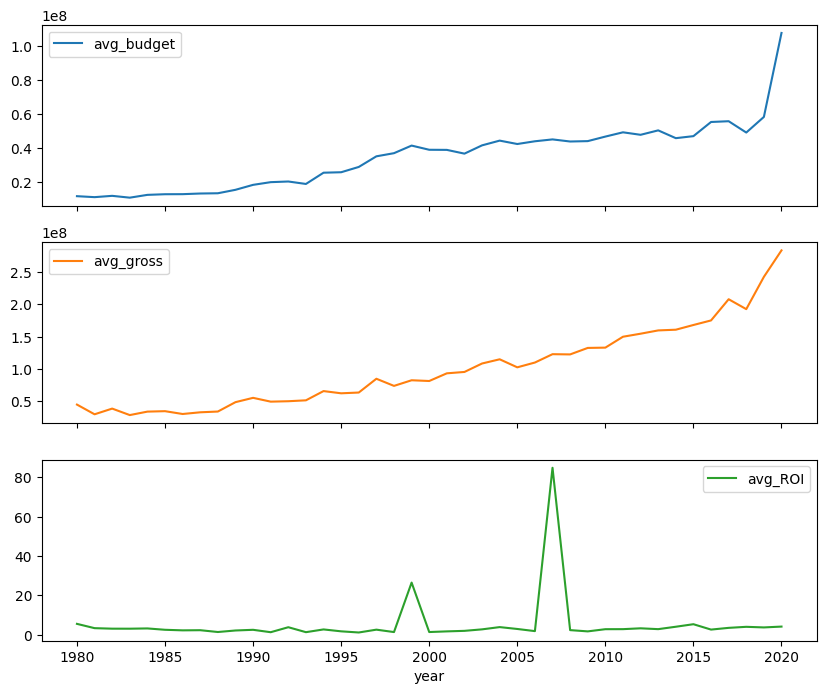

In [15]:

# =========================
# 15. TIME TREND ANALYSIS (Slide 15)
# =========================
trend = df.groupby("year").agg(
    avg_budget=("budget", "mean"),
    avg_gross=("gross", "mean"),
    avg_ROI=("ROI", "mean")
)
trend.plot(subplots=True, figsize=(10,8))
plt.show()


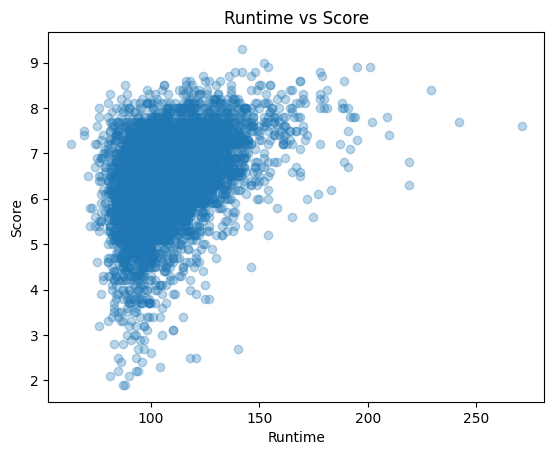

In [16]:

# =========================
# 16. RUNTIME ANALYSIS (Slide 16)
# =========================
if "runtime" in df.columns:
    plt.scatter(df["runtime"], df["score"], alpha=0.3)
    plt.xlabel("Runtime")
    plt.ylabel("Score")
    plt.title("Runtime vs Score")
    plt.show()

In [17]:

# =========================
# 17. SEGMENTATION (Slide 17)
# =========================
gross_threshold = df["gross"].quantile(0.9)
budget_median = df["budget"].median()

conditions = [
    df["gross"] >= gross_threshold,
    (df["budget"] < budget_median) & (df["ROI"] > df["ROI"].quantile(0.75)),
    (df["budget"] >= budget_median) & (df["ROI"] < 0)
]
choices = ["Blockbuster", "Indie Hit", "Failure"]

df["segment"] = np.select(conditions, choices, default="Other")
print(df["segment"].value_counts())

segment
Other          3397
Failure         765
Indie Hit       730
Blockbuster     544
Name: count, dtype: int64


In [18]:
from pathlib import Path

def ensure_dir(path: str):
    Path(path).mkdir(parents=True, exist_ok=True)

BASE_DIR = "../data"

DIRS = [
    f"{BASE_DIR}/clean",
    f"{BASE_DIR}/overview",
    f"{BASE_DIR}/financial",
    f"{BASE_DIR}/marketing",
    f"{BASE_DIR}/trend",
    f"{BASE_DIR}/audience",
    f"{BASE_DIR}/segmentation",
]

for d in DIRS:
    ensure_dir(d)


In [1]:
# =========================
# 18. EXPORT FOR STREAMLIT & PPT
# =========================

# Dataset clean
df.to_csv("../data/clean/movies_clean.csv", index=False)

# Slides 6 – Audience & Quality
df.groupby("genre", as_index=False)["score"].mean() \
  .to_csv("../data/audience/score_by_genre.csv", index=False)
df.groupby("rating", as_index=False)["score"].mean() \
  .to_csv("../data/audience/score_by_rating.csv", index=False)

# Slides 8–10 – Financial & ROI
df.groupby("genre", as_index=False)["ROI"].mean() \
  .to_csv("../data/financial/roi_by_genre.csv", index=False)
df.groupby("rating", as_index=False)["ROI"].mean() \
  .to_csv("../data/financial/roi_by_rating.csv", index=False)
top_bottom = pd.concat([
    df.sort_values("ROI", ascending=False).head(10).assign(type="Top"),
    df.sort_values("ROI").head(10).assign(type="Bottom")
])
top_bottom.to_csv("../data/financial/top_bottom_roi.csv", index=False)

# Slides 11–12 – Marketing & Engagement
df.groupby("genre", as_index=False)["CPM"].mean() \
  .to_csv("../data/marketing/cpm_by_genre.csv", index=False)
df.groupby("genre", as_index=False)["engagement"].mean() \
  .to_csv("../data/marketing/engagement_by_genre.csv", index=False)

# Slides 15–17 – Trend & Segmentation
df.groupby("year", as_index=False).agg(
    avg_budget=("budget", "mean"),
    avg_gross=("gross", "mean"),
    avg_ROI=("ROI", "mean")
).to_csv("../data/trend/yearly_trend.csv", index=False)
df[["title", "genre", "budget", "gross", "ROI", "segment"]] \
  .to_csv("../data/segmentation/movie_segments.csv", index=False)

print("Clean data success!")

NameError: name 'df' is not defined